1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [67]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

x1 = np.random.normal(loc = 0, scale = 1, size = 1000)
x2 = x1 + np.random.normal(loc = 0, scale = 3, size = 1000)
x3 = 2*x1 + x2

#Covariance matrix
data = np.array([x1, x2, x3])
cov_matrix = np.cov(data, bias=True)

#eigenvalues 
l, V = la.eig(cov_matrix)
print("l:\n", l, '\n')
real_l = np.real_if_close(l)
print("real(l):\n",real_l , '\n')
# V is the matrix of the eigenvectors
print("V:\n", V, '\n')

#SVD
U, s, Vt = la.svd(cov_matrix)
#print("shapes: U =", U.shape, "S:", s.shape, "V^T:", Vt.shape, '\n')
print("Spectrum:\n", s, '\n')
print("U:\n", U, '\n')
print("V^T:\n", Vt, '\n')

## We should see that the elements of s are the square root of the eigenvalues of cov_matrix.T*cov_matrix.
#Let's see : 
n = 1000
l_svd = s**2/(n-1)
print('l_svd: ',l_svd)

M = cov_matrix.T@cov_matrix

l1 , V1 = la.eig(M)
print(np.real_if_close(l1))
#print(np.sqrt(np.real_if_close(l1)))


l:
 [2.65174800e+01+0.j 6.20403193e-16+0.j 1.80344566e+00+0.j] 

real(l):
 [2.65174800e+01 6.20403193e-16 1.80344566e+00] 

V:
 [[-0.11613874 -0.81649658  0.56554852]
 [-0.57651391 -0.40824829 -0.70778884]
 [-0.80879138  0.40824829  0.4233082 ]] 

Spectrum:
 [2.65174800e+01 1.80344566e+00 9.24678535e-17] 

U:
 [[-0.11613874  0.56554852 -0.81649658]
 [-0.57651391 -0.70778884 -0.40824829]
 [-0.80879138  0.4233082   0.40824829]] 

V^T:
 [[-0.11613874 -0.57651391 -0.80879138]
 [ 0.56554852 -0.70778884  0.4233082 ]
 [-0.81649658 -0.40824829  0.40824829]] 

l_svd:  [7.03880626e-01 3.25567191e-03 8.55886279e-36]
[ 7.03176746e+02 -2.81227067e-15  3.25241624e+00]


In [22]:
# percentage of variability
Lambda = np.diag(real_l)
print("Lambda:\n", Lambda, '\n')
print("Trace(cov_matrix):\n", cov_matrix.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0, 0]/Lambda.trace()))

Lambda:
 [[2.71533317e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.23249083e-16 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.95459413e+00]] 

Trace(cov_matrix):
 29.107925787317654 

Trace(Lambda):
 29.107925787317676 

By selecting the component 0, we retain 0.93% of the total variability


Eigenvalue: (27.153331653376284+0j) ,	eigenvector: [-0.11293342 -0.58051381 -0.80638066]
Eigenvalue: (1.23249083403889e-16+0j) ,	eigenvector: [-0.81649658 -0.40824829  0.40824829]
Eigenvalue: (1.9545941339413897+0j) ,	eigenvector: [ 0.56619729 -0.70451193  0.42788266]
Eigenvalue: (27.153331653376284+0j) ,	eigenvector: [ 1.00000000e+00 -2.17658393e-16 -2.48537762e-16]
Eigenvalue: (1.23249083403889e-16+0j) ,	eigenvector: [-2.17658393e-16  1.00000000e+00 -2.52914422e-16]
Eigenvalue: (1.9545941339413897+0j) ,	eigenvector: [-2.48537762e-16 -2.52914422e-16  1.00000000e+00]


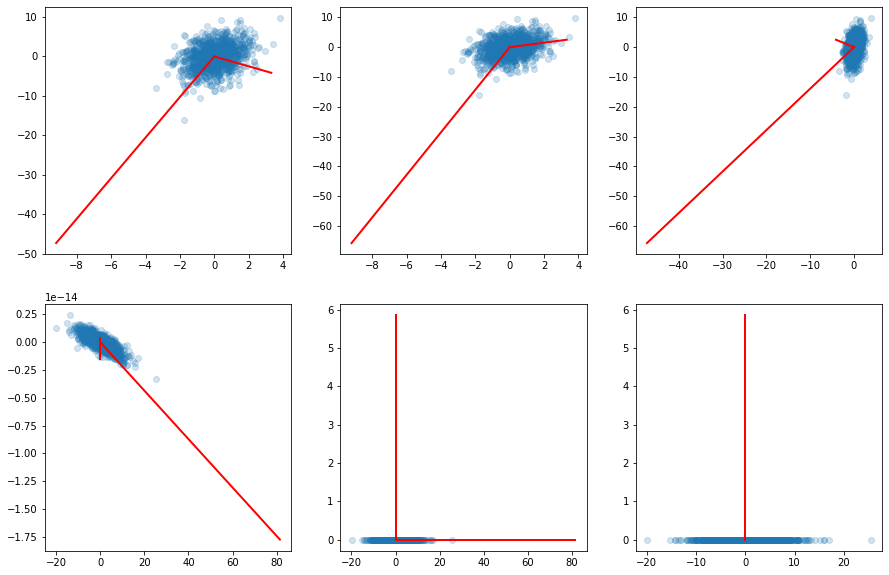

In [58]:
# Let's now take the eigenvectors as new basis vectors and redefine the data points w.r.t. this new basis.
data_new = np.dot(V.T, data)

fig , ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(15,10))

#plot original:

# the original data distribution
ax1.scatter(data[0,:], data[1,:], alpha=0.2)
ax2.scatter(data[0,:], data[1,:], alpha=0.2)
ax3.scatter(data[0,:], data[1,:], alpha=0.2)

# the new basis data distribution
ax4.scatter(data_new[0,:], data_new[1,:], alpha=0.2)
ax5.scatter(data_new[0,:], data_new[1,:], alpha=0.2)
ax6.scatter(data_new[0,:], data_new[1,:], alpha=0.2)

# a scale factor to graphically enhance the lines - only for visualization purposes
scale_factor = 3

# draw each eigenvectors rescaled by the eigenvalues
for li, vi in zip(l, V.T):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    ax1.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
    ax2.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
    ax3.plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)


for li, vi in zip(l,np.dot(V.T,V)):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    ax4.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
    ax5.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
    ax6.plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)



2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

(3, 1000)


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 